In [1]:
import sys
from pathlib import Path

ROOT = Path().resolve().parent.parent
sys.path.append(str(ROOT))

In [ ]:
from src.preprocess.pipeline.handler import PipelineHandler
handler = PipelineHandler(data_folder = ROOT / 'data')

## 1. Preprocess ground truth images
Download decals file from https://zenodo.org/records/10845026/files/Galaxy10_DECals.h5

In [ ]:
decals_file = ROOT / 'data' / "Galaxy10_DECals.h5"
eso_names_file = ROOT / 'data' / 'eso_images_names.csv'

handler.get_gt_images(decals_file=decals_file, eso_names_file=eso_names_file)

Extracting ESO images...
Downloaded 2 ESO images to /Users/luisvalenzuela/Documents/Programs/Memoria/data2/raw/eso
Reference images extraction completed.


In [8]:
handler.set_fits_images()

Creating directory: /Users/luisvalenzuela/Documents/Programs/Memoria/data2/processed
Formatting FITS images of folder: /Users/luisvalenzuela/Documents/Programs/Memoria/data2/raw/eso


## 2. Simulate observations

data_update using version casarundata-2025.08.07-1.tar.gz, acquiring the lock ... 


lock file is not empty : /Users/luisvalenzuela/.casa/data/data_update.lock
data_update: the lock file at /Users/luisvalenzuela/.casa/data is not empty.
A previous attempt to update path may have failed or exited prematurely.
Remove the lock file and set force to True with the desired version (default to most recent).
It may be best to completely re-populate path using pull_data and measures_update.
2025-08-27 19:29:31	SEVERE	::casa	lock file is not empty : /Users/luisvalenzuela/.casa/data/data_update.lock
2025-08-27 19:29:31	SEVERE	::casa	data_update: the lock file at /Users/luisvalenzuela/.casa/data is not empty.
2025-08-27 19:29:31	SEVERE	::casa	A previous attempt to update path may have failed or exited prematurely.
2025-08-27 19:29:31	SEVERE	::casa	Remove the lock file and set force to True with the desired version (default to most recent).
2025-08-27 19:29:31	SEVERE	::casa	It may be best to completely re-populate path using pull_data and measures_update.
2025-08-27 19:29:31	SEVERE

Found 2 processed images for simulation.


2025-08-27 19:29:33	WARN	noise::CTPatchedInterp::interpolate	In caltable groundtruth.alma.out23.noisy.T.cal_sim_temp (Tf Jones):
2025-08-27 19:29:33	WARN	noise::CTPatchedInterp::interpolate+	 Insufficient solution channel sampling (nchan=1) for frequency-dependent LINEAR interpolation 
2025-08-27 19:29:33	WARN	noise::CTPatchedInterp::interpolate+	 of calibration for MS spw=0; using NEAREST instead.
2025-08-27 19:29:35	WARN	noise::CTPatchedInterp::interpolate	In caltable groundtruth.alma.out21.noisy.T.cal_sim_temp (Tf Jones):
2025-08-27 19:29:35	WARN	noise::CTPatchedInterp::interpolate+	 Insufficient solution channel sampling (nchan=1) for frequency-dependent LINEAR interpolation 
2025-08-27 19:29:35	WARN	noise::CTPatchedInterp::interpolate+	 of calibration for MS spw=0; using NEAREST instead.
2025-08-27 19:29:36	WARN	noise::CTPatchedInterp::interpolate	In caltable groundtruth.alma.out20.noisy.T.cal_sim_temp (Tf Jones):
2025-08-27 19:29:36	WARN	noise::CTPatchedInterp::interpolate+	 Insu

Simulation of observations completed.


2025-08-27 19:29:40	WARN	noise::CTPatchedInterp::interpolate	In caltable groundtruth.alma.out20.noisy.T.cal_sim_temp (Tf Jones):
2025-08-27 19:29:40	WARN	noise::CTPatchedInterp::interpolate+	 Insufficient solution channel sampling (nchan=1) for frequency-dependent LINEAR interpolation 
2025-08-27 19:29:40	WARN	noise::CTPatchedInterp::interpolate+	 of calibration for MS spw=0; using NEAREST instead.


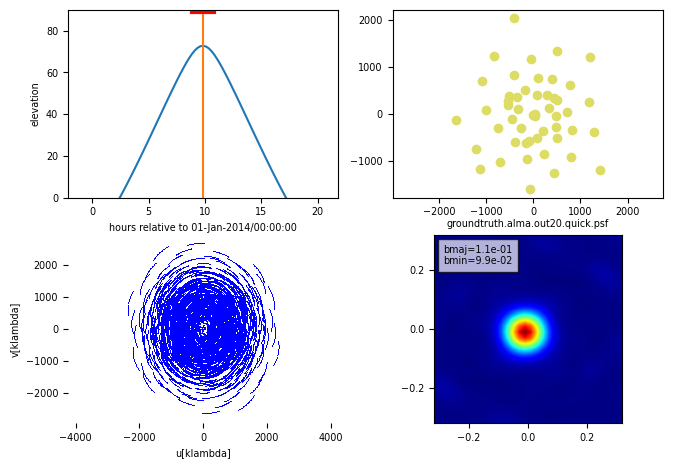

In [9]:
sim_conditions = [
    {  
        'antenna' : 'alma.out23.cfg',
        'totaltime' : 30000, # in seconds
        'noise': 5,  # in Jy
        'arcsec': 0.02,  # in arcseconds
        'indirection': 'J2000 12h00m00 -23d00m00'
    },
    {
        'antenna' : 'alma.out21.cfg',
        'totaltime' : 14400, # in seconds
        'noise': 10, # in Jy
        'arcsec': 0.02, # in arcseconds
        'indirection': 'J2000 12h00m00 -30d00m00'
    },
    {
        'antenna' : 'alma.out20.cfg',
        'totaltime' : 7200, # in seconds
        'noise': 20,  # in Jy
        'arcsec': 0.02,  # in arcseconds
        'indirection': 'J2000 12h00m00 -40d00m00'
    }
]

handler.simulate_observations(sim_conditions = sim_conditions)

## 3. Reconstruct simulated observations

In [10]:
rec_conditions = {
    'hogbom_config' : {
        'imsize': 256,
        'cell': '0.02arcsec',
        'niter': 50000,
        'weighting': 'natural',
    },

    'multiscale_config': {
        'imsize': 256,
        'cell': '0.02arcsec',
        'niter': 10000,
        'weighting': 'natural',
        'scales': [0, 4, 12, 32],
    },

    'mem_config': {
        'imsize': 256,
        'cell': '0.02arcsec',
        'niter': 200,
        'weighting': 'natural',
    }
}

handler.reconstruct_images(rec_conditions = rec_conditions)

Found 2 processed images for reconstruction.


2025-08-27 19:29:56	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPOSX14ARMPY310/casa6/casatools/src/code/synthesis/ImagerObjects/SDAlgorithmMSClean.cc, line 185)	MSClean minor cycle stopped at large scale negative or diverging
2025-08-27 19:29:58	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPOSX14ARMPY310/casa6/casatools/src/code/synthesis/ImagerObjects/SDAlgorithmMSClean.cc, line 185)	MSClean minor cycle stopped at large scale negative or diverging
2025-08-27 19:30:03	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPOSX14ARMPY310/casa6/casatools/src/code/synthesis/ImagerObjects/SDAlgorithmMSClean.cc, line 185)	MSClean minor cycle stopped at large scale negative or diverging


Peak Res at start of step : 11.5818
Flux at start of step : 0
MAX RES at end : 5.05609
peakres : 8.44725    model : 2397.36
Peak Res at start of step : 6.07481
Flux at start of step : 2397.36
MAX RES at end : 2.40411
peakres : 5.06282    model : 3892.06
Peak Res at start of step : 3.20798
Flux at start of step : 3892.06
MAX RES at end : 0.969239
peakres : 2.87563    model : 5696.37
Peak Res at start of step : 2.41449
Flux at start of step : 5696.37
MAX RES at end : 0.60363
peakres : 1.9423    model : 5934.46
Peak Res at start of step : 2.44264
Flux at start of step : 5934.46
MAX RES at end : 0.637833
peakres : 1.89277    model : 5935.2
Peak Res at start of step : 2.44285
Flux at start of step : 5935.2
MAX RES at end : 0.63845
peakres : 1.8922    model : 5935.97
Peak Res at start of step : 2.44305
Flux at start of step : 5935.97
MAX RES at end : 0.639063
peakres : 1.89162    model : 5936.73
Peak Res at start of step : 2.44326
Flux at start of step : 5936.73
MAX RES at end : 0.639682
pea

KeyboardInterrupt: 

In [4]:
handler.generate_data_description()

Data description saved to /Users/luisvalenzuela/Documents/Programs/Memoria/data2/rec_data_description.csv
